In [2]:
import os
from shutil import copyfile
import json
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
from pprint import pprint

%matplotlib inline

In [2]:
example = "P1199"

with open("train/labels/new/"+example+".txt", "r") as f:
    lines = f.readlines()
    print(lines[0])
    bbox = []
    
# Closing file
f.close()

98.0 597.0 122.0 597.0 122.0 622.0 98.0 622.0 small-vehicle 0



In [3]:
import pandas as pd

# Read CSV file into DataFrame df
df = pd.read_csv("train/labels/new/"+example+".txt", header=None, delimiter=' ')

# Show dataframe
#print(df)

data = df.to_numpy()
print(data)

[[98.0 597.0 122.0 ... 622.0 'small-vehicle' 0]
 [302.0 293.0 334.0 ... 324.0 'large-vehicle' 0]
 [109.0 300.0 147.0 ... 338.0 'large-vehicle' 0]
 ...
 [334.0 525.0 370.0 ... 561.0 'large-vehicle' 0]
 [333.0 545.0 368.0 ... 582.0 'large-vehicle' 0]
 [182.0 284.0 220.0 ... 316.0 'large-vehicle' 0]]


In [4]:
imgstr = "train/images/"+example+".png"

In [5]:
bbox = [int(x) for x in data[0][:-2]]
print(bbox)

[98, 597, 122, 597, 122, 622, 98, 622]


(857, 631, 3)
<class 'numpy.ndarray'>
(25, 24, 3)


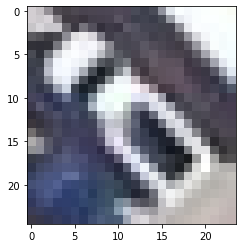

In [6]:
img = Image.open(imgstr)

arr = np.asarray(img)
print(arr.shape)
print(type(arr))

if len(arr.shape)==3:
    img2 = arr[bbox[1]:bbox[5], bbox[0]:bbox[4], :]
else:
    # image is black and white
    img2 = arr[bbox[1]:bbox[5], bbox[0]:bbox[4]]
    img2 = np.stack((img2,)*3, axis=-1)
print(img2.shape)

plt.imshow(img2)

In [15]:
train_or_val = "train" # train, val

for root, dirs, filenames in os.walk(train_or_val+"/images", topdown=False):
    pass

#print(filenames)
j = 0
for file in filenames:
    labelstr = file[:-4] + ".txt"
    if not labelstr in ["P1531.txt", "P2123.txt", "P2152.txt", "P2330.txt"]:
        df = pd.read_csv(train_or_val+'/labels/new/' + labelstr, header=None, delimiter=' ')
        data = df.to_numpy()

        imgstr = train_or_val+"/images/" + file
        img = Image.open(imgstr)
        arr = np.asarray(img)

        for i in range(len(data)):
            try:
                bbox = [int(x) for x in data[i][:-2]]
                if len(arr.shape)==3:
                    arr2 = arr[bbox[1]:bbox[5], bbox[0]:bbox[4], :]
                else:
                    # image is black and white
                    arr2 = arr[bbox[1]:bbox[5], bbox[0]:bbox[4]]
                    arr2 = np.stack((arr2,)*3, axis=-1)
                if not os.path.exists('chips_'+train_or_val):
                    os.makedirs('chips_'+train_or_val)

                # create a directory with the class name
                if not os.path.exists('chips_'+train_or_val+'/'+data[i][-2]):
                    os.makedirs('chips_'+train_or_val+'/'+data[i][-2])

                img2 = Image.fromarray(arr2.astype('uint8'), 'RGB')
                img2 = img2.save('chips_'+train_or_val+'/'+data[i][-2]+"/"+str(j)+".png")

                if j%10000==0:
                    print(j)
                j += 1
            except:
                print(labelstr, i, j)
            #if j > 30:
            #    asdf
print(j)

0
10000
20000
30000
40000
50000
60000
P1872.txt 1 63392
P1872.txt 2 63392
P1872.txt 3 63392
P1872.txt 4 63392
P1872.txt 5 63392
P1872.txt 6 63392
P1872.txt 7 63392
P1872.txt 8 63392
P1872.txt 9 63392
P1872.txt 10 63392
P1872.txt 11 63392
P1872.txt 12 63392
P1872.txt 13 63392
P1872.txt 14 63392
P1872.txt 15 63392
P1872.txt 16 63392
P1872.txt 17 63392
P1872.txt 18 63392
P1872.txt 19 63392
P1872.txt 20 63392
P1872.txt 21 63392
P1872.txt 22 63392
P1872.txt 23 63392
P1872.txt 24 63392
P1872.txt 25 63392
P1872.txt 26 63392
P1872.txt 27 63392
P1872.txt 28 63392
P1872.txt 29 63392
P1872.txt 30 63392
P1872.txt 31 63392
P1872.txt 32 63392
P1872.txt 33 63392
P1872.txt 34 63392
P1872.txt 35 63392
P1872.txt 36 63392
P1872.txt 37 63392
P1872.txt 38 63392
P1872.txt 39 63392
P1872.txt 40 63392
P1872.txt 41 63392
P1872.txt 42 63392
P1872.txt 43 63392
P1872.txt 44 63392
P1872.txt 45 63392
P1872.txt 46 63392
P1872.txt 59 63404
P1872.txt 73 63417
P1872.txt 74 63417
P1872.txt 75 63417
P1872.txt 76 63417
P1

In [16]:
train_or_val = "val" # train, val

for root, dirs, filenames in os.walk(train_or_val+"/images", topdown=False):
    pass

#print(filenames)
j = 0
for file in filenames:
    labelstr = file[:-4] + ".txt"
    if not labelstr in ["P1531.txt", "P2123.txt", "P2152.txt", "P2330.txt"]:
        df = pd.read_csv(train_or_val+'/labels/new/' + labelstr, header=None, delimiter=' ')
        data = df.to_numpy()

        imgstr = train_or_val+"/images/" + file
        img = Image.open(imgstr)
        arr = np.asarray(img)

        for i in range(len(data)):
            try:
                bbox = [int(x) for x in data[i][:-2]]
                if len(arr.shape)==3:
                    arr2 = arr[bbox[1]:bbox[5], bbox[0]:bbox[4], :]
                else:
                    # image is black and white
                    arr2 = arr[bbox[1]:bbox[5], bbox[0]:bbox[4]]
                    arr2 = np.stack((arr2,)*3, axis=-1)
                if not os.path.exists('chips_'+train_or_val):
                    os.makedirs('chips_'+train_or_val)

                # create a directory with the class name
                if not os.path.exists('chips_'+train_or_val+'/'+data[i][-2]):
                    os.makedirs('chips_'+train_or_val+'/'+data[i][-2])

                img2 = Image.fromarray(arr2.astype('uint8'), 'RGB')
                img2 = img2.save('chips_'+train_or_val+'/'+data[i][-2]+"/"+str(j)+".png")

                if j%10000==0:
                    print(j)
                j += 1
            except:
                print(labelstr, i, j)
            #if j > 30:
            #    asdf
print(j)

0
10000
20000
28853


In [76]:
print(labelstr, i, j)

P1872.txt 1 63392


In [57]:
for root, dirs, filenames in os.walk("chips_train", topdown=False):
    pass

class_info = {}
for d in dirs:
    all_sizes = []
    for root, dirs, filenames in os.walk("chips_train/"+d, topdown=False):
        pass
    print(d, len(filenames))
    for f in filenames:
        imgstr = "chips_train/"+d+"/"+f
        img = Image.open(imgstr)
        arr = np.asarray(img)
        all_sizes.append(arr.shape[:2])
    class_info[d] = {
        'num_examples': len(filenames),
        'min': np.min(all_sizes),
        'max': np.max(all_sizes),
        'mean': np.mean(all_sizes),
        'median': np.median(all_sizes)
    }

baseball-diamond 415
basketball-court 515
bridge 2047
ground-track-field 325
harbor 5983
helicopter 630
large-vehicle 16969
plane 7971
roundabout 399
ship 28068
small-vehicle 26126
soccer-ball-field 326
storage-tank 5029
swimming-pool 1736
tennis-court 2367


In [6]:
pprint(class_info)

{'baseball-diamond': {'max': 1001,
                      'mean': 122.13373493975904,
                      'median': 92.5,
                      'min': 27,
                      'num_examples': 415},
 'basketball-court': {'max': 369,
                      'mean': 128.23300970873785,
                      'median': 118.0,
                      'min': 16,
                      'num_examples': 515},
 'bridge': {'max': 1307,
            'mean': 48.35173424523693,
            'median': 30.0,
            'min': 3,
            'num_examples': 2047},
 'ground-track-field': {'max': 1722,
                        'mean': 262.88,
                        'median': 152.0,
                        'min': 12,
                        'num_examples': 325},
 'harbor': {'max': 1955,
            'mean': 133.42955039277953,
            'median': 88.0,
            'min': 9,
            'num_examples': 5983},
 'helicopter': {'max': 509,
                'mean': 62.07380952380952,
                'median': 57.0,

In [58]:
print('min', np.min([x['min'] for x in class_info.values()]))
print('max', np.max([x['max'] for x in class_info.values()]))
print('mean', np.mean([x['mean'] for x in class_info.values()]))
print('median', np.median([x['median'] for x in class_info.values()]))

min 2
max 1955
mean 104.20063439770135
median 57.0


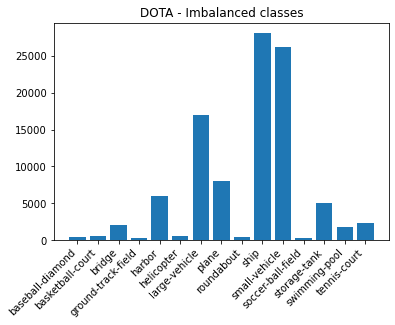

In [60]:
ys = [x['num_examples'] for x in class_info.values()]
xs = [x for x in class_info.keys()]
plt.bar(xs, ys)
plt.xticks(rotation=45, ha='right')
plt.title("DOTA - Imbalanced classes")
plt.savefig("imbalanced.png",
            dpi=100,
            bbox_inches='tight')
plt.show()

In [39]:
# BALANCE THE TRAINING DATA (don't need to balance the testing data?)
# take a random sample of n=1000 (max) from each class
train_or_val = 'train'
N_EXAMPLES = 500
random.seed(42)

for root, dirs, filenames in os.walk("chips_train", topdown=False):
    pass

if not os.path.exists('chips_'+train_or_val+'_'+str(N_EXAMPLES)):
    os.makedirs('chips_'+train_or_val+'_'+str(N_EXAMPLES))

class_info = {}
for d in dirs:
    
    if not os.path.exists('chips_'+train_or_val+'_'+str(N_EXAMPLES)+'/'+d):
        os.makedirs('chips_'+train_or_val+'_'+str(N_EXAMPLES)+'/'+d)
    
    for root, dirs, filenames in os.walk("chips_train/"+d, topdown=False):
        pass
    print(d, len(filenames))
    
    # if > 1k examples, take random sample
    if len(filenames) > N_EXAMPLES:
        filenames = random.sample(filenames, N_EXAMPLES)
    for f in filenames:
        sourcefile = "chips_train/"+d+"/"+f
        destfile = "chips_train_"+str(N_EXAMPLES)+"/"+d+"/"+f
        copyfile(sourcefile, destfile)

baseball-diamond 415
basketball-court 515
bridge 2047
ground-track-field 325
harbor 5983
helicopter 630
large-vehicle 16969
plane 7971
roundabout 399
ship 28068
small-vehicle 26126
soccer-ball-field 326
storage-tank 5029
swimming-pool 1736
tennis-court 2367


In [42]:
for root, dirs, filenames in os.walk("chips_train_"+str(N_EXAMPLES), topdown=False):
    pass

class_info = {}
for d in dirs:
    all_sizes = []
    for root, dirs, filenames in os.walk("chips_train_"+str(N_EXAMPLES)+"/"+d, topdown=False):
        pass
    print(d, len(filenames))
    for f in filenames:
        imgstr = "chips_train_"+str(N_EXAMPLES)+"/"+d+"/"+f
        img = Image.open(imgstr)
        arr = np.asarray(img)
        all_sizes.append(arr.shape[:2])
    class_info[d] = {
        'num_examples': len(filenames),
        'min': np.min(all_sizes),
        'max': np.max(all_sizes),
        'mean': np.mean(all_sizes),
        'median': np.median(all_sizes)
    }

baseball-diamond 415
basketball-court 500
bridge 500
ground-track-field 325
harbor 500
helicopter 500
large-vehicle 500
plane 500
roundabout 399
ship 500
small-vehicle 500
soccer-ball-field 326
storage-tank 500
swimming-pool 500
tennis-court 500


In [43]:
print('min', np.min([x['min'] for x in class_info.values()]))
print('max', np.max([x['max'] for x in class_info.values()]))
print('mean', np.mean([x['mean'] for x in class_info.values()]))
print('median', np.median([x['median'] for x in class_info.values()]))

min 3
max 1722
mean 104.14175267645301
median 57.5


In [45]:
(104.14+57.5)/2

80.82

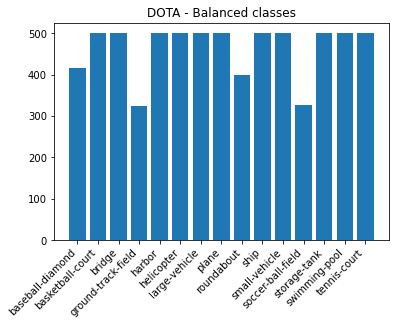

In [56]:
ys = [x['num_examples'] for x in class_info.values()]
xs = [x for x in class_info.keys()]
plt.bar(xs, ys)
plt.xticks(rotation=45, ha='right')
plt.title("DOTA - Balanced classes")
plt.savefig("balanced.png",
            dpi=100,
            bbox_inches='tight')
plt.show()

In [49]:
plt.savefig("balanced.png")

<Figure size 432x288 with 0 Axes>

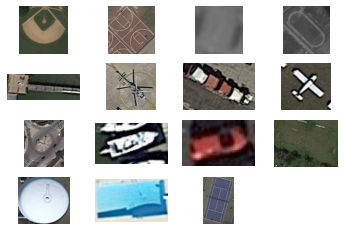

In [7]:
for root, dirs, filenames in os.walk("chips_train", topdown=False):
    pass

which_example = 7
imgstrs = []
imgclasses = []
for d in dirs:
    for root, dirs2, filenames in os.walk("chips_train/"+d, topdown=False):
        pass
    imgstr = "chips_train/"+d+"/"+filenames[which_example]
    imgstrs.append(imgstr)
    imgclasses.append(d)

# show them
fig = plt.figure()
rows = 4
cols = 4
for row in range(rows):
    for col in range(cols):
        ind = rows*row+col
        if ind == 15: # there are only 15 classes
            break
        ax1 = fig.add_subplot(rows,cols,ind+1)
        img = mpimg.imread(imgstrs[ind])
        imgplot = plt.imshow(img)
        #plt.title(imgclasses[ind])
        plt.axis('off')
plt.show()
fig.savefig("dota_4x4.png")